# FUTURE SALES PREDICTION WITH MACHINE LEARNIG

Predicting the future sales of a product helps a business in managing the manufacturing and advertising cost of the product. In this small project, I  tried to build a model that can predict  future sales based on the money spent on different types of platforms for advertising.

# Importing important libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
import warnings
warnings.filterwarnings('ignore')


# Loading DATASET

In [2]:
df=pd.read_csv(r"C:\Users\91708\Desktop\Advertising.csv")

# About dataset

The dataset i got from kaggle contains the data about the sales of the product.The dataset about the advertising cost incurred by the business on the various platform below is the information about the columns.

TV:-Money spent on advertising on tv.

Radio:-Money spent on advertising on Radio.

Newspaper:-Money spent on advertising on Newspaper.

Sales:-Sales of product.

# Data inspetion

In [3]:
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Data cleaning

In [6]:
df.set_index(['Unnamed: 0'],inplace=True) #droping unnmed column.

In [7]:
df.reset_index(inplace=True,drop=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.isnull().sum()  #checking null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Checking outliers

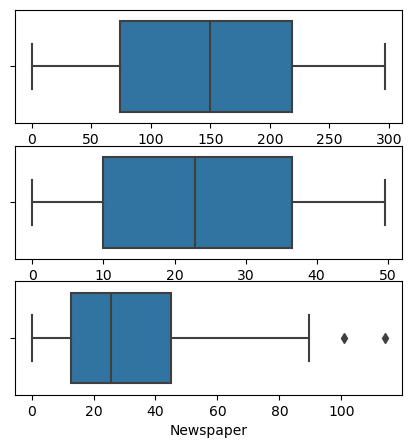

In [10]:
fig,axs=plt.subplots(3,figsize=(5,5))
tv_plt=sns.boxplot(df['TV'], ax=axs[0])
radio_plt=sns.boxplot(df['Radio'],ax=axs[1])
newspapper_plt=sns.boxplot(df['Newspaper'],ax=axs[2])

There are no considerable outliers present in data

# EDA(exploratory data analysis)

<AxesSubplot:xlabel='Sales', ylabel='TV'>

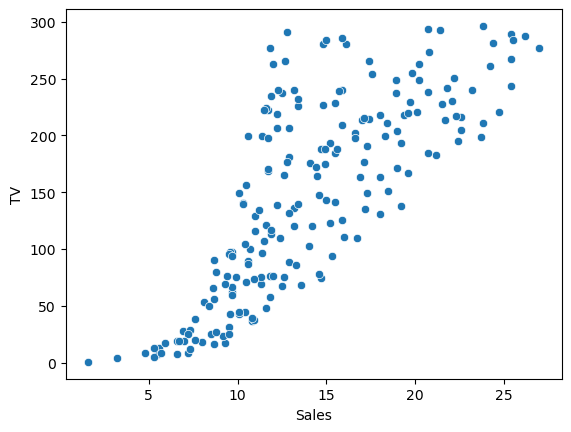

In [11]:
sns.scatterplot("Sales","TV",data=df) #cheking relationship with target variable(Sales)

<AxesSubplot:xlabel='Sales', ylabel='Radio'>

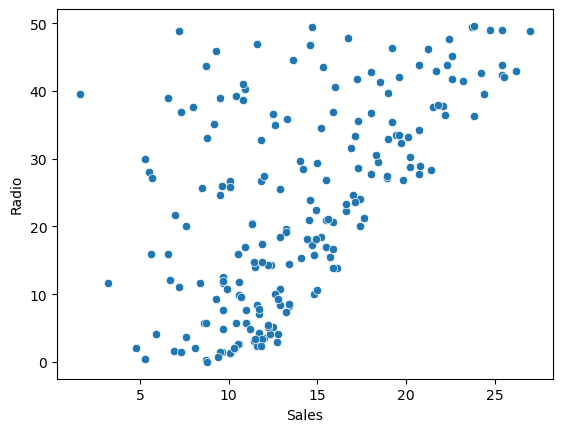

In [12]:
sns.scatterplot("Sales","Radio",data=df) #cheking relationship with target variable(Sales)

<AxesSubplot:xlabel='Sales', ylabel='Newspaper'>

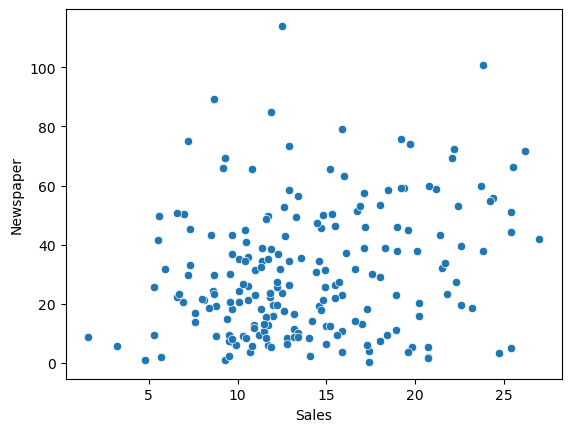

In [13]:
sns.scatterplot("Sales","Newspaper",data=df) #cheking relationship with target variable(Sales)

# Correlaion of each feature

In [14]:
correlation = df.corr()
print(correlation)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


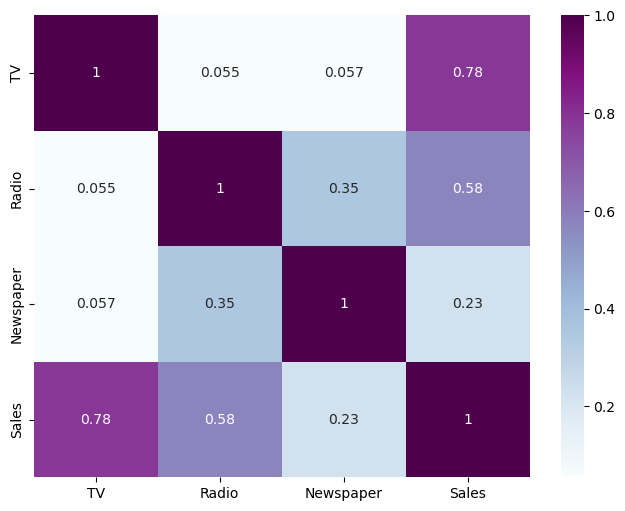

In [15]:
plt.figure(figsize=(8,6))
g=sns.heatmap(df.corr(),annot=True,cmap='BuPu') #visualising correlation

In [16]:
#seprate features and target variable 
Y = df.iloc[:,3]
X = df.iloc[:, :-1]


In [17]:
X.head()


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [18]:
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=30) #spliting dataset into training(80%) and test(20%) 


# Training model for future prediction.

In [20]:

model=LinearRegression()
model.fit(X_train,Y_train)
print(model.score(X_test,Y_test))

0.9080112550671722


As per my model giving a score of 0.91 means my model is fitting properly so no need to check other parameters.

In [21]:
feed={'TV':[24.12,230.34,110.45,101,90.87],'Radio':[4.45,32.34,67.54,23.3,39.7],'Newspaper':[7.5,35.67,54.21,12.34,23.89]}

In [22]:
feed_df=pd.DataFrame(feed)

In [25]:
(model.predict(feed_df))#Here we predict the sales based on the data I gave to the model.

array([ 4.98176973, 19.54484776, 20.49922385, 11.93265591, 14.47542654])